First 5 Rows:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive Statistics

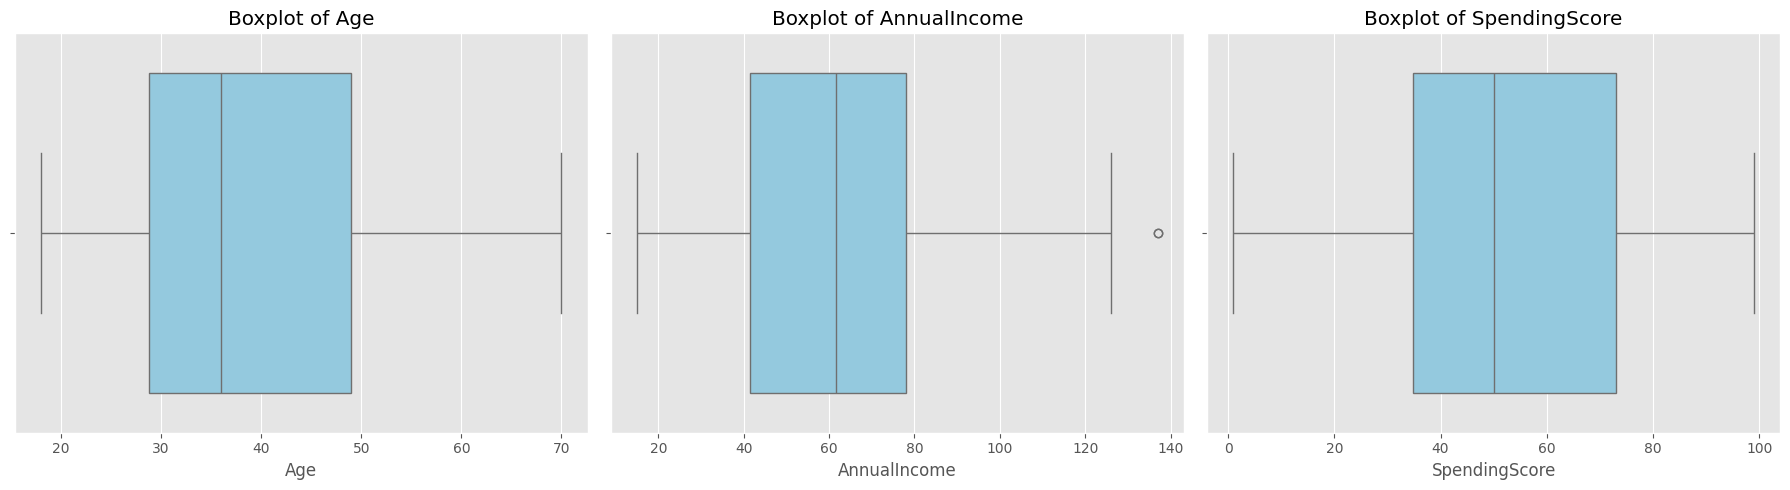

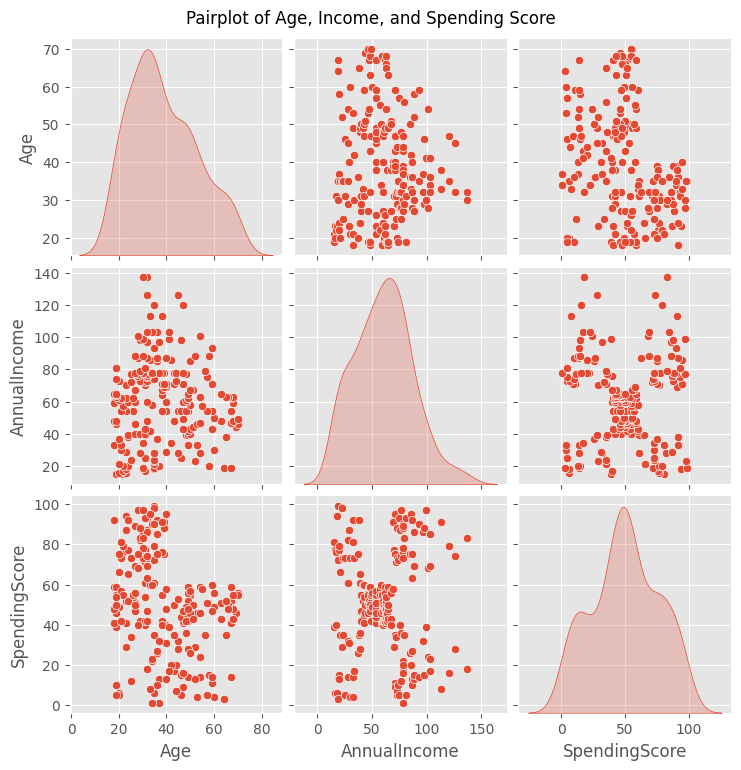

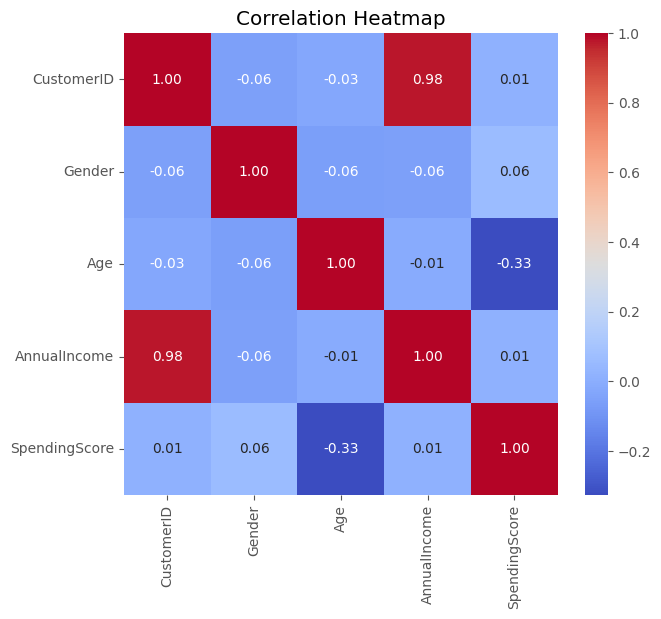


Cleaned and Scaled Data Preview:
    CustomerID  Gender  Age  AnnualIncome  SpendingScore  Age_scaled  \
0           1       0   19            15             39   -1.424569   
1           2       0   21            15             81   -1.281035   
2           3       1   20            16              6   -1.352802   
3           4       1   23            16             77   -1.137502   
4           5       1   31            17             40   -0.563369   

   Income_scaled  Score_scaled  
0      -1.738999     -0.434801  
1      -1.738999      1.195704  
2      -1.700830     -1.715913  
3      -1.700830      1.040418  
4      -1.662660     -0.395980  

Cleaned dataset saved as 'Cleaned_Mall_Customers.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: LOAD DATA
url = "https://raw.githubusercontent.com/DataMinati/Datasets-/master/Mall_Customers.csv"
data = pd.read_csv(url)

# STEP 3: INITIAL EXPLORATION
print("First 5 Rows:\n", data.head())
print("\nData Info:\n")
print(data.info())
print("\nDescriptive Statistics:\n", data.describe())

# STEP 4: CHECK FOR MISSING VALUES AND DUPLICATES
print("\nMissing values:\n", data.isnull().sum())
print("Duplicate records:", data.duplicated().sum())

# STEP 5: CLEANING AND ENCODING
data.rename(columns={
    'Genre': 'Gender',
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# STEP 6: OUTLIER VISUALIZATION
plt.figure(figsize=(18, 5))
for i, column in enumerate(['Age', 'AnnualIncome', 'SpendingScore'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# STEP 7: DISTRIBUTION & CORRELATION
sns.pairplot(data[['Age', 'AnnualIncome', 'SpendingScore']], diag_kind='kde')
plt.suptitle("Pairplot of Age, Income, and Spending Score", y=1.02)
plt.show()

plt.figure(figsize=(7, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# STEP 8: FEATURE SCALING
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])
scaled_df = pd.DataFrame(scaled_features, columns=['Age_scaled', 'Income_scaled', 'Score_scaled'])

# Combine scaled features with original data
final_df = pd.concat([data, scaled_df], axis=1)

# Preview the final cleaned dataset
print("\nCleaned and Scaled Data Preview:\n", final_df.head())

# STEP 9: SAVE CLEANED DATA
final_df.to_csv("Cleaned_Mall_Customers.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_Mall_Customers.csv'")
